# 1 导入所需模块

In [1038]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import math
import random

# 2 读取数据集

In [1039]:
wine_data=datasets.load_wine()#加载红酒数据集
wine_data

# breast_cancer_data=datasets.load_breast_cancer()#加载乳腺癌数据集
# breast_cancer_data

# iris_data=datasets.load_iris()#加载鸢尾花数据集
# iris_data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [1040]:
# #特征选择
# wine_df_selection=wine_df[['proanthocyanins','flavanoids','od280/od315_of_diluted_wines','total_phenols',
#                           'malic_acid','alcohol','Species']]
# wine_df_selection

#将数据集转换为dataframe形式，便于观察
wine_df=pd.DataFrame(wine_data['data'],columns=
                    ['alcohol',
                    'malic_acid',
                    'ash',
                    'alcalinity_of_ash',
                    'magnesium',
                    'total_phenols',
                    'flavanoids',
                    'nonflavanoid_phenols',
                    'proanthocyanins',
                    'color_intensity',
                    'hue',
                    'od280/od315_of_diluted_wines',
                    'proline'])
wine_df['Species']=wine_data.target
wine_df

# #将数据集转换为dataframe形式，便于观察
# breast_cancer_df=pd.DataFrame(breast_cancer_data['data'],columns=
#                     ['mean radius',
#                     'mean texture',
#                     'mean perimeter',
#                     'mean area',
#                     'mean smoothness',
#                     'mean compactness',
#                     'mean concavity',
#                     'mean concave points', 'mean symmetry', 'mean fractal dimension',
#         'radius error', 'texture error', 'perimeter error', 'area error',
#         'smoothness error', 'compactness error', 'concavity error',
#         'concave points error', 'symmetry error',
#         'fractal dimension error', 'worst radius', 'worst texture',
#         'worst perimeter', 'worst area', 'worst smoothness',
#         'worst compactness', 'worst concavity', 'worst concave points',
#         'worst symmetry', 'worst fractal dimension'])
# breast_cancer_df['Species']=breast_cancer_data.target
# breast_cancer_df

# #将数据集转换为dataframe形式，便于观察
# iris_df=pd.DataFrame(iris_data['data'],columns=
#                     ['sepal length (cm)',
#                      'sepal width (cm)',
#                      'petal length (cm)',
#                      'petal width (cm)'])
# iris_df['Species']=iris_data.target
# iris_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Species
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


# 3 定义划分训练集与测试集的划分函数Split_DataSet()

In [1041]:
#传入两个参数：dataset-待划分的数据集 ratio-训练集与测试集的划分比例
def Split_DataSet(dataset,ratio):
    random.shuffle(dataset)#首先将数据集中的样本数据进行随机排序，使得划分更具随机性，提高模型训练的泛化能力
    train_dataset_size=int(len(dataset)*ratio)#获得训练集的大小
    train_dataset=dataset[:train_dataset_size]#将数据集中的前train_dataset_size个样本数据划分到训练集中
    test_dataset=dataset[train_dataset_size:]#将数据集中的后（len(dataset)-train_dataset_size)个样本数据划分到测试集中
    return train_dataset,test_dataset#返回训练集和测试集

## 自定义比例对数据集进行划分

In [1042]:
# #包内的划分函数
# winelabel=wine_df['Species']
# winelabel
# y=np.array(winelabel)
# winedata=wine_df.drop(columns='Species')
# winedata
# x=np.array(winedata)
# X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
# X_train_df=pd.DataFrame(X_train)
# X_train_df
# y_train_df=pd.DataFrame(y_train)
# y_train_df
# train_dataset=pd.concat([X_train_df,y_train_df],axis=1)
# train_dataset=np.array(train_dataset).tolist()
# # train_dataset

# X_test_df=pd.DataFrame(X_test)
# X_test_df
# y_test_df=pd.DataFrame(y_test)
# y_test_df
# test_dataset=pd.concat([X_test_df,y_test_df],axis=1)
# test_dataset=np.array(test_dataset).tolist()
# # test_dataset

dataset=np.array(wine_df).tolist()#将数据集转换为列表形式，方便后续的计算操作
train_dataset,test_dataset=Split_DataSet(dataset,ratio=0.7)#按照训练集:测试集=7:3的比例进行划分

# 4 定义DatesetClassifying()函数，按照不同类别对训练集进行分类，以便计算P(c)=|Dc|/|D|

In [1043]:
#传入一个参数：dataset-待分类的数据集
def DatesetClassifying(dataset):
    classifying_detailed_info={}#保存不同类别下的样本数据信息
    classifying_rough_info={}#保存不同类别下样本个数信息
    for sample in dataset:#遍历数据集中的每一行
        if sample[-1] not in classifying_detailed_info:#如果某一类标签不在字典中
            classifying_detailed_info[sample[-1]]=[]
            classifying_rough_info[sample[-1]]=0
        classifying_detailed_info[sample[-1]].append(sample)#加入该类的样本数据
        classifying_rough_info[sample[-1]]+=1#样本数增加
    return classifying_detailed_info,classifying_rough_info#返回两个字典

classifying_detailed_info,classifying_rough_info=DatesetClassifying(train_dataset)#获得训练集的样本分类结果
classifying_rough_info#得到分类结果信息

{0.0: 41, 2.0: 32, 1.0: 51}

## 定义Class_ Probability()函数，计算P(c)=|Dc|/|D|

In [1044]:
#传入两个参数：dataset-待计算的数据集 c_rough_info-dataset数据集的样本分类信息
def Class_Probability(dataset,c_rough_info):
    class_prob={}#保存P(c),其中c={0,1,2}
    dataset_size=len(dataset)#获取数据集的大小
    for cvalue,cnum in c_rough_info.items():#从样本分类信息字典中获得每个类别cvalue及其对应的样本个数cnum
        class_prob[cvalue]=cnum/float(dataset_size)#计算三类P(c)值
    return class_prob#返回P(c)结果信息

class_prob=Class_Probability(train_dataset,classifying_rough_info)
class_prob#得到三个类别的P(c)值

{0.0: 0.33064516129032256, 2.0: 0.25806451612903225, 1.0: 0.4112903225806452}

# 5 定义Probability_Density()概率密度函数，计算不同属性在不同类别中的概率密度P(xi|c)

In [1045]:
#首先，定义简单的取均值和取方差的函数
def mean(list):
    list=[float(x) for x in list] #将元素处理为数值
    return sum(list)/float(len(list))#获得均值
def variance(list):
    list=[float(x) for x in list]
    average=mean(list)
    variance=sum([math.pow((x-average),2) for x in list])/float(len(list)-1)#获得方差
    return variance#获得方差

In [1046]:
#然后，定义Probability_Density()概率密度函数，计算P(xi|c)
def Probability_Density(x,mean,variance):
    exp=math.exp(math.pow((x-mean),2)/(-2*variance))
    pd=(1/math.sqrt(2*math.pi*variance))*exp
    return pd#获得P(xi|c)

# 6 定义Probability_Density_Multi()函数，计算P(x|c)

In [1047]:
#首先，定义Attribution_Mean_Var()函数计算数据集中样本数据不同属性的均值和方差，以便计算不同属性在不同类别中的概率密度函数
#传入一个参数：dataset-待计算数据集
def Attribution_Mean_Var(dataset):
    dataset=np.delete(dataset,-1,axis=1)#删除标签列（即target列）
    mean_var=[(mean(attribution),variance(attribution)) for attribution in zip(*dataset)]#获得不同属性的均值和方差
    return mean_var#返回结果

mean_var=Attribution_Mean_Var(train_dataset)
mean_var

[(13.001774193548382, 0.7088488591660115),
 (2.388709677419355, 1.3035934434828225),
 (2.3716129032258055, 0.07602827170207184),
 (19.566935483870967, 10.676865329137167),
 (99.51612903225806, 207.65014424337775),
 (2.2818548387096764, 0.3550428730658273),
 (2.054919354838711, 0.9758951153947021),
 (0.3645967741935485, 0.01436975478625753),
 (1.625967741935484, 0.3306388932599005),
 (4.925322580645163, 4.964301521111985),
 (0.9545967741935486, 0.0545632507212169),
 (2.6233870967741932, 0.4771624180435354),
 (731.3064516129032, 93150.50694990829)]

In [1048]:
#然后，定义AMV_Class()函数，计算不同类别下不同属性的均值和方差，以便计算P(x|c)
#传入一个参数：dataset-待计算的数据集
def AMV_Class(dataset):
    classifying_detailed_info,classifying_rough_info=DatesetClassifying(dataset)#获得数据集分类信息
    amv_class={}#保存不同类别下不同属性均值和方差的字典
    for cvalue,csample in classifying_detailed_info.items():#cvalue是数据集中的类别，csample是每个类别下的样本信息
        amv_class[cvalue]=Attribution_Mean_Var(csample)#获得每个类别（3个）中不同属性（13个）的均值和方差
    return amv_class#返回每个类别中不同属性的均值和方差

amv_class=AMV_Class(train_dataset)
amv_class#得到训练集中不同类别下不同属性的均值和方差

{0.0: [(13.757317073170736, 0.22272012195121943),
  (2.0717073170731704, 0.5820395121951217),
  (2.4580487804878053, 0.05730609756097562),
  (17.28048780487805, 6.325109756097563),
  (106.36585365853658, 114.33780487804877),
  (2.7963414634146337, 0.10178378048780487),
  (2.9490243902439026, 0.13717402439024393),
  (0.28731707317073163, 0.005045121951219511),
  (1.9014634146341465, 0.14038780487804878),
  (5.444146341463414, 1.3522198780487809),
  (1.0521951219512196, 0.01468256097560976),
  (3.142682926829268, 0.11212012195121954),
  (1080.2439024390244, 56134.93902439026)],
 2.0: [(13.2765625, 0.280920060483871),
  (3.319375, 1.4775479838709682),
  (2.4325000000000006, 0.038296774193548405),
  (21.28125, 4.773185483870968),
  (97.53125, 117.61189516129032),
  (1.6968750000000001, 0.1545963709677419),
  (0.7684375, 0.08403296370967742),
  (0.4449999999999999, 0.012703225806451614),
  (1.1996874999999998, 0.21378377016129035),
  (7.164999999999998, 5.325935483870969),
  (0.675624999999

In [1049]:
#最后，定义Probability_Density_Multi()函数，计算P(x|c)
#传入两个参数：sample-待预测样本 amv_class-训练集中不同类别下不同属性的均值和方差
def Probability_Density_Multi(sample_data,amv_class):
    PDM={}#保存P(x|c)
    for cvalue,mean_var in amv_class.items():#cvalue-类别，mean_var-不同类别下不同属性的均值和方差
        PDM[cvalue]=1#先初始化每个类别的p(x|c)为1
        for i in range(len(mean_var)):
            mean,variance=mean_var[i]#获得每个类别中不同属性的均值和方差
            x=sample_data[i]
            pdm=Probability_Density(x,mean,variance)
            PDM[cvalue]*=pdm
    return PDM#返回每个类别下的p(x|c)

sample=test_dataset[1]
sample_data=sample[:-1]
amv_class=AMV_Class(train_dataset)
PDM=Probability_Density_Multi(sample_data,amv_class)
PDM

{0.0: 8.867431542266003e-34,
 2.0: 3.094595022261475e-09,
 1.0: 2.623961610492528e-17}

# 7 定义高斯朴素贝叶斯分类器Naive_Bayesian_Classifier()函数对样本进行分类

In [1050]:
#输入一个参数：sample-待预测的样本
def Naive_Bayesian_Classifier(sample_data):
    class_prob=Class_Probability(train_dataset,classifying_rough_info)#p(c)
    amv_class=AMV_Class(train_dataset)#按类别将样本进行分类
    PDM=Probability_Density_Multi(sample_data,amv_class)#计算p(x|c)
    result={}#保存结果
    for cvalue,pdm in PDM.items():
        p=pdm*class_prob[cvalue]#计算p(x|c=1)*p(c)
        result[cvalue]=p#得到p(c=1|x)...p(c=4|x)
    return max(result,key=result.get)#返回概率最大的类标签

#单例测试
sample=test_dataset[2]
sample_data=sample[:-1]
result =int(Naive_Bayesian_Classifier(sample_data)) 
print("样本 {0} 被预测为第 {1} 类.".format(sample_data,result))

样本 [14.38, 3.59, 2.28, 16.0, 102.0, 3.25, 3.17, 0.27, 2.19, 4.9, 1.04, 3.44, 1065.0] 被预测为第 0 类.


# 8 评估分类器

In [1051]:
#输入一个参数：dataset-待处理的数据集 计算分类器的得分情况
def NB_Classifier_ACC(dataset):
    count=0
    for sample in dataset:
        sample_data=sample[:-1]
        sample_label=sample[-1]
        result=Naive_Bayesian_Classifier(sample_data)
        if result==sample_label:
            count+=1
    return count/len(dataset)

Acc_train_dataset=NB_Classifier_ACC(train_dataset)#获得分类器在训练集上的得分
Acc_test_dataset=NB_Classifier_ACC(test_dataset)#获得分类器在测试集上的得分
print(Acc_train_dataset,Acc_test_dataset)

0.9758064516129032 0.9814814814814815


# 9 调包实现分类

In [1052]:
from sklearn.datasets import load_wine,load_breast_cancer,load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report

# wine=load_wine()
# wine.feature_names
# wine.data
# wine.data.size
# wine.target_names

wine=load_wine()
wine
wine_ddf=pd.DataFrame(wine['data'],columns=
                    ['alcohol',
                    'malic_acid',
                    'ash',
                    'alcalinity_of_ash',
                    'magnesium',
                    'total_phenols',
                    'flavanoids',
                    'nonflavanoid_phenols',
                    'proanthocyanins',
                    'color_intensity',
                    'hue',
                    'od280/od315_of_diluted_wines',
                    'proline'])
wine_ddf['Species']=wine.target
wine_ddf

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Species
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [1053]:
#红酒数据集-多分类任务-应用MultinomialNB分类器
winedate_label=wine_ddf['Species']
winedate_label
y=np.array(winedate_label)
winedate_data=wine_ddf.drop(columns='Species')
winedate_data
x=np.array(winedate_data)

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
naive_bayes=MultinomialNB()
naive_bayes.fit(X_train,y_train)
y_predicted=naive_bayes.predict(X_test)
print('Accuracy:',accuracy_score(y_test,y_predicted))

Accuracy: 0.9074074074074074


In [1054]:
#鸢尾花数据集-二分类任务-应用GaussianNB分类器
X,y=load_iris(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

naive_bayes=GaussianNB()
naive_bayes.fit(X_train,y_train)

y_predicted=naive_bayes.predict(X_test)

print('Accuracy:',accuracy_score(y_test,y_predicted))

Accuracy: 1.0


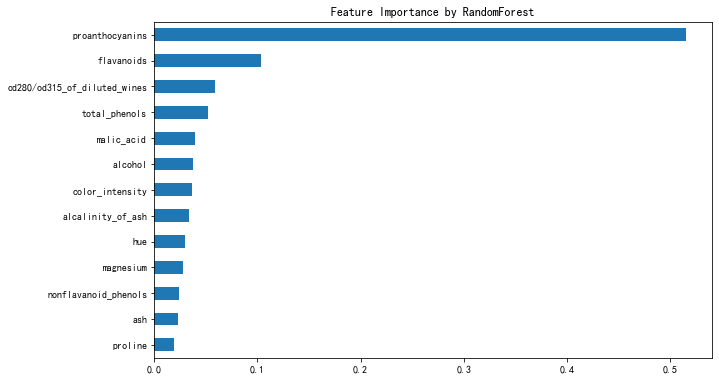

In [1055]:
#特征提取示例
from sklearn.ensemble import RandomForestClassifier

X=wine_df.iloc[:,0:13]
y=wine_df.iloc[:,8]
# 创建分类器
model = RandomForestClassifier(random_state=30)

# 拟合数据
model.fit(X, y.astype('int'))

# 提取特征重要性
importance = pd.Series(model.feature_importances_, index=X.columns)
importance = importance.sort_values()

# 可视化
ax = importance.plot.barh(figsize = (10, 6.18), title="Feature Importance by RandomForest")

# 10 实验结果可视化

## 10.1 在不同数据上的实验结果展示

<ipython-input-1056-de7a7e298c3f>:51: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


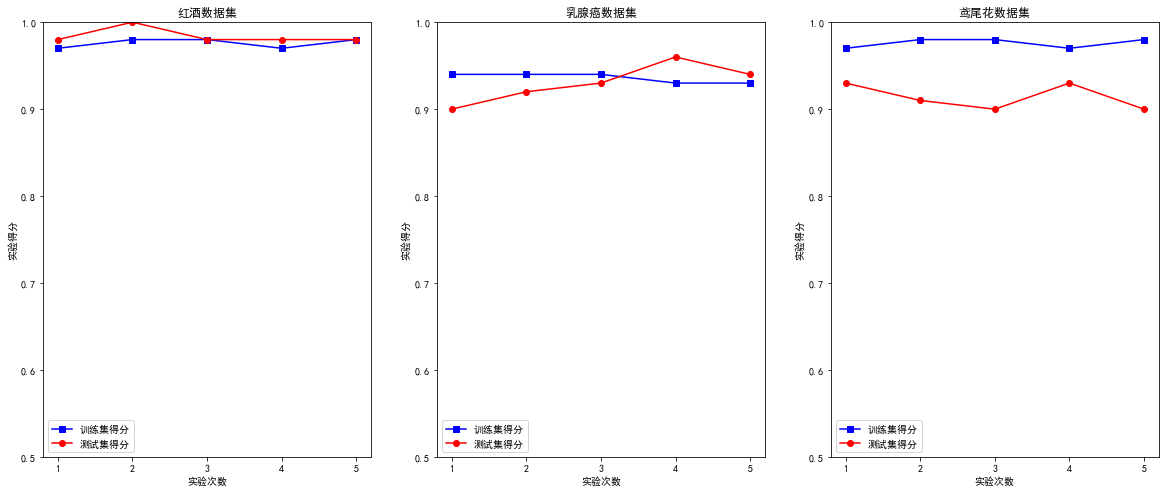

In [1056]:
import matplotlib
import matplotlib.pyplot as plt
# from matplotlib import mpl
matplotlib.rcParams["font.sans-serif"] = ["SimHei"]#设置显示中文字体
matplotlib.rcParams["axes.unicode_minus"] = False#设置正常显示符号

wine_times=[1,2,3,4,5]
wine_train_score=[0.97,0.98,0.98,0.97,0.98]
wine_test_score=[0.98,1,0.98,0.98,0.98]

breast_cancer_times=[1,2,3,4,5]
breast_cancer_train_score=[0.94,0.94,0.94,0.93,0.93]
breast_cancer_test_score=[0.9,0.92,0.93,0.96,0.94]

iris_times=[1,2,3,4,5]
iris_train_score=[0.97,0.98,0.98,0.97,0.98]
iris_test_score=[0.93,0.91,0.9,0.93,0.9]

fig=plt.figure(figsize=(20,8))
fig.add_subplot(1,3,1)
plt.plot(wine_times,wine_train_score,'bs-',
        wine_times,wine_test_score,'ro-')
plt.xlabel('实验次数')
plt.ylabel('实验得分')
plt.ylim([0.5,1])
plt.xticks(wine_times)
plt.title('红酒数据集')
plt.legend(['训练集得分','测试集得分'],loc='lower left')

fig.add_subplot(1,3,2)
plt.plot(breast_cancer_times,breast_cancer_train_score,'bs-',
        breast_cancer_times,breast_cancer_test_score,'ro-')
plt.xlabel('实验次数')
plt.ylabel('实验得分')
plt.ylim([0.5,1])
plt.xticks(breast_cancer_times)
plt.title('乳腺癌数据集')
plt.legend(['训练集得分','测试集得分'],loc='lower left')

fig.add_subplot(1,3,3)
plt.plot(iris_times,iris_train_score,'bs-',
        iris_times,iris_test_score,'ro-')
plt.xlabel('实验次数')
plt.ylabel('实验得分')
plt.ylim([0.5,1])
plt.xticks(breast_cancer_times)
plt.title('鸢尾花数据集')
plt.legend(['训练集得分','测试集得分'],loc='lower left')

fig.savefig('不同数据集上的实验效果.png')
fig.show()
# ax1=axeses[0]
# ax2=axeses[0]
# ax3=axeses[0]
# ax1.plot(wine_times,wine_train_score,'bs-',
#         wine_times,wine_test_score,'ro-')
# ax1.xlabel('实验次数')
# ax1.ylabel('实验得分')
# ax1.ylim([0.8,1])
# ax1.xticks(wine_times)
# ax1.title('红酒数据集')
# ax1.legend(['训练集得分','测试集得分'])

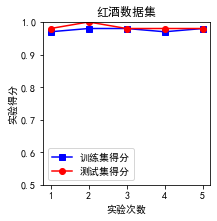

In [1057]:
plt.figure(figsize=(3,3))
plt.plot(wine_times,wine_train_score,'bs-',
        wine_times,wine_test_score,'ro-')
plt.xlabel('实验次数')
plt.ylabel('实验得分')
plt.ylim([0.5,1])
plt.xticks(wine_times)
plt.title('红酒数据集')
plt.legend(['训练集得分','测试集得分'])
plt.savefig('红酒数据集7：3实验结果.png')
plt.show()

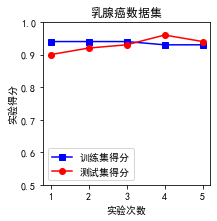

In [1058]:
plt.figure(figsize=(3,3))
plt.plot(breast_cancer_times,breast_cancer_train_score,'bs-',
        breast_cancer_times,breast_cancer_test_score,'ro-')
plt.xlabel('实验次数')
plt.ylabel('实验得分')
plt.ylim([0.5,1.0])
plt.xticks(breast_cancer_times)
plt.title('乳腺癌数据集')
plt.legend(['训练集得分','测试集得分'])
plt.savefig('乳腺癌数据集7：3实验结果.png')
plt.show()

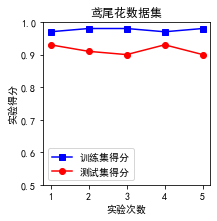

In [1059]:
plt.figure(figsize=(3,3))
plt.plot(iris_times,iris_train_score,'bs-',
        iris_times,iris_test_score,'ro-')
plt.xlabel('实验次数')
plt.ylabel('实验得分')
plt.ylim([0.5,1.0])
plt.xticks(iris_times)
plt.title('鸢尾花数据集')
plt.legend(['训练集得分','测试集得分'])
plt.savefig('鸢尾花数据集7：3实验结果.png')
plt.show()

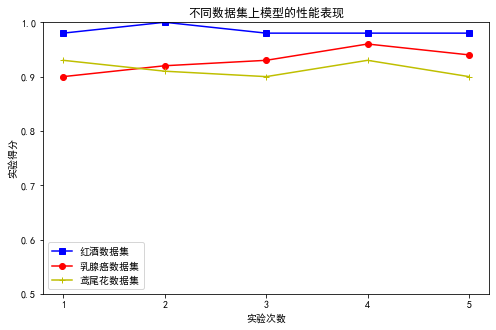

In [1060]:
plt.figure(figsize=(8,5))
plt.plot(wine_times,wine_test_score,'bs-',
         wine_times,breast_cancer_test_score,'ro-',
         wine_times,iris_test_score,'y+-')
plt.xlabel('实验次数')
plt.ylabel('实验得分')
plt.ylim([0.5,1.0])
plt.xticks(wine_times)
plt.title('不同数据集上模型的性能表现')
plt.legend(['红酒数据集','乳腺癌数据集','鸢尾花数据集'])
plt.savefig('不同数据集上模型的性能表现')
plt.show()

## 10.2 在不同划分情况下的实验结果展示

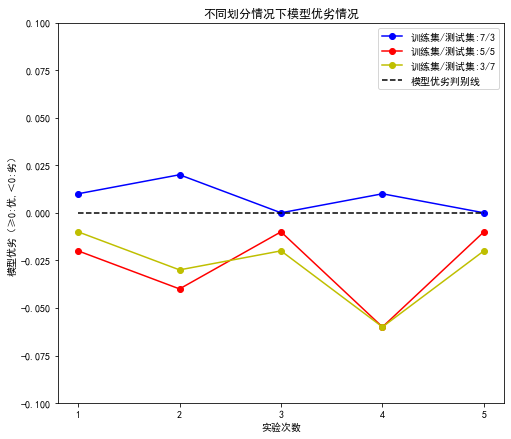

In [1061]:
times=[1,2,3,4,5]
model_score_7_3=[0.01,0.02,0,0.01,0]
model_score_5_5=[-0.02,-0.04,-0.01,-0.06,-0.01]
model_score_3_5=[-0.01,-0.03,-0.02,-0.06,-0.02]
groudth=[0,0,0,0,0]
plt.figure(figsize=(8,7))
plt.plot(times,model_score_7_3,'bo-',
        times,model_score_5_5,'ro-',
        times,model_score_3_5,'yo-',
        times,groudth,'k--')
plt.xlabel('实验次数')
plt.ylabel('模型优劣（≥0:优,＜0:劣）')
plt.ylim([-0.1,0.1])
plt.xticks(times)
plt.title('不同划分情况下模型优劣情况')
plt.legend(['训练集/测试集:7/3','训练集/测试集:5/5','训练集/测试集:3/7','模型优劣判别线'])
plt.savefig('不同划分情况下模型优劣情况.png')
plt.show()